<a href="https://colab.research.google.com/github/BertrandCAS/bcamasteria/blob/main/MobileNetV2_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Codigo Fuente del Modelo SSD MobileNet V2

# Init de las librerias

In [ ]:
!pip install tensorflow opencv-python matplotlib --quiet

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Mar 11 09:34:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BsAqmhIsWiGW1zX1mzmR")
project = rf.workspace("omares").project("epi-dataset-ssd")
version = project.version(1)
dataset = version.download("coco")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 44.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to epi-dataset-ssd-1 in coco:: 100%|██████████| 2809/2809 [00:00<00:00, 5119.22it/s]


#Análisis de Contenido :
esta celda recorre la estructura de directorios del dataset especificado y muestra el contenido de cada carpeta, imprimiendo hasta 5 archivos por carpeta.

In [ ]:
import os

# Ruta del dataset
dataset_path = "/content/epi-dataset-ssd-1"

# Imprimir el contenido del dataset descargado
print("Contenido del dataset descargado:")
for root, dirs, files in os.walk(dataset_path):
    print(f"{root}")
    for file in files[:5]:  # Mostrar 5 archivos por carpeta
        print(f"   {file}")


Contenido del dataset descargado:
/content/epi-dataset-ssd-1
   README.roboflow.txt
   README.dataset.txt
/content/epi-dataset-ssd-1/valid
   construction-705-_jpg.rf.eb3efc280bc30c3955684c7f255e2c3f.jpg
   construction-2-_mp4-149_jpg.rf.f15069dcad47a6d96fab88b9f5a8504e.jpg
   ppe_0355_jpg.rf.0f6a975d98213a3c28cf9e80ccc2d5f3.jpg
   RTX7CD4D-e1580252893876_jpg.rf.5d1bf64f116858584c6a602cdcb52f5d.jpg
   000415_jpg.rf.f4de07c17251efcb72717a80b3455185.jpg
/content/epi-dataset-ssd-1/test
   image_620_jpg.rf.10eb71033f75d725d95a17f54c5eecba.jpg
   autox3_mp4-49_jpg.rf.fbec92f3546449c41db11dd8e8b3a229.jpg
   img17_jpg.rf.042da9105f5e1124323147e7f4e662e6.jpg
   construction-4-_mp4-127_jpg.rf.d398a8a0b5af45845a6da0e893914027.jpg
   construction-4-_mp4-38_jpg.rf.aa465041c62228e2bf5316b337dc3d67.jpg
/content/epi-dataset-ssd-1/train
   ezgif-frame-049_jpg.rf.efe6d894fa663c7451391c6039bbdb57.jpg
   youtube-829_jpg.rf.6adc783eb5d246094bf48fca485da1d1.jpg
   005100_jpg.rf.2a26c9ebe1f3e8380483641ea28b

#Análisis de Contenido / consistencia con respecto al formato COCO
Este script monta Google Drive y verifica la presencia de archivos de anotaciones COCO en las subcarpetas "train", "valid" y "test" del dataset epi dataset ssd proveniendo de la herramienta Roboflow. Imprime un mensaje indicando si las anotaciones fueron encontradas o no en cada subcarpeta.

In [ ]:
import os

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/epi-dataset-ssd-1"


# Definir las rutas de imágenes y etiquetas
train_images_path = os.path.join(dataset_path, "train", "images")
train_annotations_path = os.path.join(dataset_path, "train", "annotations", "_annotations.coco.json")
valid_images_path = os.path.join(dataset_path, "valid", "images")
valid_annotations_path = os.path.join(dataset_path, "valid", "annotations", "_annotations.coco.json")

# Verificar la presencia de anotaciones COCO en cada carpeta
for subdir in ["train", "valid", "test"]:
    annotations_path = os.path.join(dataset_path, subdir, "_annotations.coco.json")
    if os.path.exists(annotations_path):
        print(f"Anotaciones encontradas en {subdir}: {annotations_path}")
    else:
        print(f"No se encontraron anotaciones en {subdir} ! Verifica el formato del dataset.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Anotaciones encontradas en train: /content/epi-dataset-ssd-1/train/_annotations.coco.json
Anotaciones encontradas en valid: /content/epi-dataset-ssd-1/valid/_annotations.coco.json
Anotaciones encontradas en test: /content/epi-dataset-ssd-1/test/_annotations.coco.json


#Análisis de Contenido:
Este script verifica la existencia de un archivo de anotaciones COCO y, si existe, lo carga y muestra las primeras cinco anotaciones. Si el archivo no existe, imprime un mensaje de error.

In [ ]:
import os
import json

# Cargar el archivo COCO y mostrar algunas anotaciones
if os.path.exists(annotations_path):
    with open(annotations_path, "r") as f:
        coco_data = json.load(f)

    print("Ejemplos de anotaciones del archivo COCO:")
    for i, ann in enumerate(coco_data["annotations"][:5]):  # Mostrar las 5 primeras anotaciones
        print(f"Anotación {i+1}: {ann}")
else:
    print(f"El archivo {annotations_path} no existe ! Verifica el dataset.")



Ejemplos de anotaciones del archivo COCO:
Anotación 1: {'id': 0, 'image_id': 0, 'category_id': 5, 'bbox': [141, 0, 225, 156], 'area': 35100, 'segmentation': [], 'iscrowd': 0}
Anotación 2: {'id': 1, 'image_id': 0, 'category_id': 5, 'bbox': [0, 255, 272, 385], 'area': 104720, 'segmentation': [], 'iscrowd': 0}
Anotación 3: {'id': 2, 'image_id': 0, 'category_id': 4, 'bbox': [0, 581, 188, 59], 'area': 11092, 'segmentation': [], 'iscrowd': 0}
Anotación 4: {'id': 3, 'image_id': 0, 'category_id': 3, 'bbox': [26, 265, 116, 125], 'area': 14500, 'segmentation': [], 'iscrowd': 0}
Anotación 5: {'id': 4, 'image_id': 1, 'category_id': 4, 'bbox': [150, 197, 17, 20], 'area': 340, 'segmentation': [], 'iscrowd': 0}


#Análisis de Contenido:
Esta función carga un archivo de anotaciones COCO, verifica la correspondencia entre los IDs de las clases y sus nombres, y muestra la distribución de anotaciones por clase. Luego, se llama a la función para verificar un archivo específico de anotaciones de entrenamiento.

In [ ]:
import json

def verificar_clases_coco(annotations_path):
    """
    Verifica la correspondencia de los IDs de las clases COCO y muestra su distribución.
    """
    with open(annotations_path, "r", encoding="utf-8") as f:
            coco_data = json.load(f)

    categories = {cat["id"]: cat["name"] for cat in coco_data["categories"]}
    class_counts = {}

    for ann in coco_data["annotations"]:
        class_id = ann.get("category_id")
        if class_id in categories:
            class_counts[class_id] = class_counts.get(class_id, 0) + 1
        else:
            print(f"Advertencia: Se encontró un ID de clase desconocido ({class_id}).")

    print("\nCorrespondencia de clases COCO:")
    for class_id, name in categories.items():
        print(f" - ID {class_id}: {name} ({class_counts.get(class_id, 0)} anotaciones)")

    print("✅ Verificación completada.")

# Ruta del archivo de anotaciones
train_annotations_path = "/content/epi-dataset-ssd-1/train/_annotations.coco.json"

# Verificación del archivo train_annotations_path
verificar_clases_coco(train_annotations_path)





📌 Correspondencia de clases COCO:
 - ID 0: chaleco-y-casco-Ajax (0 anotaciones)
 - ID 1: Casco (2253 anotaciones)
 - ID 2: Chaleco (2071 anotaciones)
 - ID 3: No-Casco (1682 anotaciones)
 - ID 4: No-Chaleco (2898 anotaciones)
 - ID 5: Persona (6767 anotaciones)
✅ Verificación completada.


In [ ]:
# 📌 Définition des chemins vers les images et annotations du dataset
dataset_path = "/content/drive/My Drive/TFM DATASET SSD"

train_images_path = os.path.join(dataset_path, "train", "images")
train_annotations_path = os.path.join(dataset_path, "train", "annotations", "_annotations.coco.json")

valid_images_path = os.path.join(dataset_path, "valid", "images")
valid_annotations_path = os.path.join(dataset_path, "valid", "annotations", "_annotations.coco.json")

test_images_path = os.path.join(dataset_path, "test", "images")
test_annotations_path = os.path.join(dataset_path, "test", "annotations", "_annotations.coco.json")



#Tratamiento : Preprocesamiento de Datos para Detección de Objetos con Anotaciones COCO

Este script prepara los datos para entrenar el modelo SSD, asegurandose de que las imágenes y anotaciones estan listas para ser utilizadas.
1. Importación de bibliotecas
Importamos bibliotecas necesarias para manejar datos, procesar imágenes y trabajar con modelos de aprendizaje automático.
2. Definición de Constantes
Definimos el tamaño de las imagenes, el numero de clases y el maximo de objetos por imagen.
3. Función "cargar_datos_coco"
Creamos una función para cargar imágenes y anotaciones desde archivos JSON.
4. Lectura del archivo de anotaciones
Se le el archivo JSON que contiene información sobre las imágenes y los objetos en ellas.
5. Inicialización de Listas
Creamos listas para almacenar las imágenes y las etiquetas de los objetos.
6. Asociación de IDs de imágenes
Relacionamos cada ID de imagen con su nombre de archivo y dimensiones.
7. Procesamiento de anotaciones
Recorremos las anotaciones para obtener la clase y las coordenadas de cada objeto, normalizando estas coordenadas.
8. Procesamiento de imagenes
Leemos y redimensionamos cada imagen, añadiéndola a la lista de imagenes procesadas.
9. Preparación de etiquetas
Limitamos el numero de objetos por imagen y añadimos relleno si es necesario.
10. Corrección de ztiquetas
Corregimos los indices de clase y convertimos las etiquetas a un formato adecuado para el entrenamiento.
11. Verificaciones y return
Imprimimos información sobre los datos cargados y devolvemos las imagenes y etiquetas procesadas.
12. Carga de Datos
Usamos la función para cargar los datos de entrenamiento y validación, verificando que todo esté correcto antes de entrenar un modelo.

In [ ]:
import numpy as np
import json
import os
import cv2
import tensorflow as tf

# 🔹 Définition des constantes
IMG_SIZE = 224
NUM_CLASSES = 5  # ✅ Seulement 5 classes valides
MAX_BOXES = 10

def cargar_datos_coco(images_path, annotations_path):
    with open(annotations_path, "r") as f:
        coco_data = json.load(f)

    images = []
    labels_class = []
    labels_bbox = []

    image_id_to_filename = {img["id"]: img["file_name"] for img in coco_data["images"]}
    image_id_to_size = {img["id"]: (img["width"], img["height"]) for img in coco_data["images"]}

    labels_dict = {img_id: [] for img_id in image_id_to_filename.keys()}

    # Compteur d'annotations supprimées
    eliminadas = 0

    for annotation in coco_data["annotations"]:
        image_id = annotation["image_id"]
        class_id = annotation["category_id"]

        # ❌ Ignorer la classe 0 (chaleco-y-casco-ajax)
        if class_id == 0:
            eliminadas += 1
            continue

        # ✅ Seules les classes entre 1 et 5 sont acceptées
        if class_id not in [1, 2, 3, 4, 5]:
            continue

        # 🔹 Ajuster les classes pour qu'elles soient dans [0, 4] avant le one-hot encoding
        class_id -= 1  # Convertir [1,2,3,4,5] en [0,1,2,3,4]

        # ✅ Extraction correcte des coordonnées
        xmin, ymin, w, h = annotation["bbox"]
        xmax = xmin + w
        ymax = ymin + h

        # ✅ Vérification et récupération des dimensions de l'image
        if image_id not in image_id_to_size:
            print(f"⚠️ Erreur: Dimensions non trouvées pour image_id {image_id}")
            continue

        width, height = image_id_to_size[image_id]

        # ✅ Debug : Vérifier les dimensions avant normalisation
        if width <= 1 or height <= 1:
            print(f"⚠️ Problème détecté : Dimensions incorrectes (w={width}, h={height}) pour image {image_id}")

        # ✅ Correction : éviter la division par des dimensions incorrectes
        if width > 1 and height > 1:
            xmin = xmin / width
            ymin = ymin / height
            xmax = xmax / width
            ymax = ymax / height
        else:
            print(f"⚠️ Dimensions invalides pour image {image_id} : (w={width}, h={height}) - Normalisation ignorée")
            xmin, ymin, xmax, ymax = 0, 0, 0, 0  # Valeurs par défaut pour éviter les erreurs

        # 🔥 Vérification après correction
        if xmax > 1 or ymax > 1 or xmin < 0 or ymin < 0:
            print(f"⚠️ Anomalie détectée : {xmin, ymin, xmax, ymax} dans l'image {image_id}")

        # Ajouter l'annotation corrigée à la liste
        labels_dict[image_id].append([class_id, xmin, ymin, xmax, ymax])

    for image_id, img_name in image_id_to_filename.items():
        img_path = os.path.join(images_path, img_name)
        if not os.path.exists(img_path):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
        images.append(img)

        # 🔹 Récupérer les annotations associées (limitées à MAX_BOXES)
        label = labels_dict.get(image_id, [])[:MAX_BOXES]

        # 🔹 Compléter avec des valeurs nulles si nécessaire
        while len(label) < MAX_BOXES:
            label.append([-1, 0, 0, 0, 0])  # Utilisation de -1 pour les lignes vides

        label = np.array(label, dtype=np.float32)

        # 🔹 Extraire les classes et les bounding boxes
        class_labels = label[:, 0]  # Classes (inclut potentiellement -1)
        bbox_labels = label[:, 1:]  # Bounding boxes

        # ✅ Supprimer les annotations invalides (-1)
        # ✅ Vérification et filtrage des classes invalides
        valid_idx = class_labels >= 0
        class_labels = class_labels[valid_idx]  # Garde uniquement les classes valides
        bbox_labels = bbox_labels[valid_idx]  # Garde uniquement les bounding boxes valides

        # ✅ Assure-toi que la liste ne soit pas vide après suppression
        if len(class_labels) == 0:
            class_labels = np.array([0])  # Ajoute une classe 0 par défaut
            bbox_labels = np.zeros((1, 4), dtype=np.float32)  # Ajoute une bbox vide

        # ✅ Assure-toi que bbox_labels a toujours MAX_BOXES lignes
        while len(bbox_labels) < MAX_BOXES:
            bbox_labels = np.vstack([bbox_labels, [0, 0, 0, 0]])  # Remplissage

        bbox_labels = bbox_labels[:MAX_BOXES]  # Truncate si trop grand

        # ✅ Conversion en entiers et correction des valeurs hors range
        class_labels = np.round(class_labels).astype(int)
        class_labels = np.clip(class_labels, 0, NUM_CLASSES - 1)

        # ✅ Initialisation du one-hot encoding
        class_labels_one_hot = np.zeros((MAX_BOXES, NUM_CLASSES), dtype=np.float32)

        # ✅ Remplissage sécurisé des classes valides
        for i, class_id in enumerate(class_labels[:MAX_BOXES]):
            if class_id >= 0:  # ✅ Vérifie que l'index est valide
                class_labels_one_hot[i, class_id] = 1.0

        # 🔹 Ajouter aux listes de données
        labels_class.append(class_labels_one_hot)
        labels_bbox.append(bbox_labels)

    print(f"Número total de imágenes cargadas: {len(images)}")
    print(f"Número total de anotaciones eliminadas (clase 0): {eliminadas}")

    return (
        np.array(images, dtype=np.float32),
        np.array(labels_class, dtype=np.float32),
        np.array(labels_bbox, dtype=np.float32)
    )

# 📌 Cargar y corregir los datos ANTES del entrenamiento
X_train, y_train_class, y_train_bbox = cargar_datos_coco(train_images_path, train_annotations_path)
X_valid, y_valid_class, y_valid_bbox = cargar_datos_coco(valid_images_path, valid_annotations_path)

# 🔍 Vérification approfondie des bounding boxes après chargement
print("\n🔍 **Diagnostic approfondi des bounding boxes**")
print(f"📌 Min/Max de y_train_bbox : {y_train_bbox.min()} / {y_train_bbox.max()} (Doit être entre 0 et 1)")
print(f"📌 Min/Max de y_valid_bbox : {y_valid_bbox.min()} / {y_valid_bbox.max()} (Doit être entre 0 et 1)")

print("\n✅ Preprocesamiento terminado con éxito 🚀")



⚠️ Anomalie détectée : (0.684375, 0.4171875, 0.999578125, 1.00021875) dans l'image 563
Número total de imágenes cargadas: 1963
Número total de anotaciones eliminadas (clase 0): 0
⚠️ Anomalie détectée : (0.0, 0.5109375, 0.339328125, 1.0005) dans l'image 171
Número total de imágenes cargadas: 560
Número total de anotaciones eliminadas (clase 0): 0

🔍 **Diagnostic approfondi des bounding boxes**
📌 Min/Max de y_train_bbox : 0.0 / 1.0 (Doit être entre 0 et 1)
📌 Min/Max de y_valid_bbox : 0.0 / 1.000499963760376 (Doit être entre 0 et 1)

✅ Preprocesamiento terminado con éxito 🚀


In [ ]:
# Assurer que toutes les valeurs sont bien comprises entre 0 et 1
y_valid_bbox = np.clip(y_valid_bbox, 0, 1)

##Data Augmentation pour les classes sous-représentées : Casque (1) et Chaleco (2)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# ✅ Création du générateur d'augmentation d'images
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# ✅ Identifier les classes sous-représentées
classes_to_augment = [1, 2]  # Casque et Chaleco
augmentation_factor = 2  # Multiplier par 2 le nombre d'exemples pour équilibrer

for class_id in classes_to_augment:
    class_indices = np.where(np.argmax(y_train_class, axis=-1)[:, 0] == class_id)[0]  # Sélectionner indices de la classe
    class_images = X_train[class_indices]  # Extraire les images concernées
    class_bboxes = y_train_bbox[class_indices]  # Extraire les bounding boxes associées
    class_labels = y_train_class[class_indices]  # Extraire les labels associés

    # Générer des images augmentées
    augmented_images = []
    augmented_bboxes = []
    augmented_labels = []

    for img, bbox, label in zip(class_images, class_bboxes, class_labels):
        for _ in range(augmentation_factor):  # Augmenter chaque image plusieurs fois
            transformed_img = datagen.random_transform(img)
            augmented_images.append(transformed_img)
            augmented_bboxes.append(bbox)  # Les bounding boxes restent inchangées
            augmented_labels.append(label)  # Les labels restent inchangés

    # Convertir en numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_bboxes = np.array(augmented_bboxes)
    augmented_labels = np.array(augmented_labels)

    # Ajouter les nouvelles images et leurs labels
    X_train = np.concatenate([X_train, augmented_images], axis=0)
    y_train_class = np.concatenate([y_train_class, augmented_labels], axis=0)
    y_train_bbox = np.concatenate([y_train_bbox, augmented_bboxes], axis=0)

print(f"📌 Nouvelle taille du dataset après Data Augmentation : {X_train.shape[0]}")




📌 Nouvelle taille du dataset après Data Augmentation : 7363


In [ ]:
print(f"📌 Valeurs brutes des bounding boxes avant normalisation:")
print(f"  Train: Min {y_train_bbox.min()} | Max {y_train_bbox.max()}")
print(f"  Validation: Min {y_valid_bbox.min()} | Max {y_valid_bbox.max()}")


📌 Valeurs brutes des bounding boxes avant normalisation:
  Train: Min 0.0 | Max 1.0
  Validation: Min 0.0 | Max 1.0


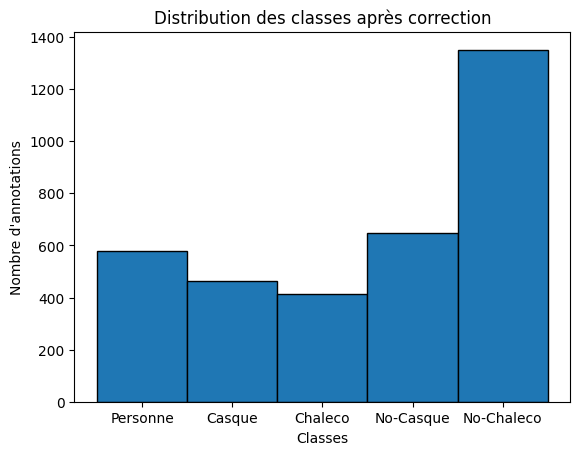

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extraire les classes non nulles (ignorer les lignes [0. 0. 0. 0. 0.])
filtered_classes = [np.argmax(row) for sample in y_valid_class for row in sample if not np.all(row == 0)]

# Tracer l’histogramme corrigé
plt.hist(filtered_classes, bins=np.arange(NUM_CLASSES + 1) - 0.5, edgecolor='black')
plt.xticks(range(NUM_CLASSES), labels=["Personne", "Casque", "Chaleco", "No-Casque", "No-Chaleco"])
plt.xlabel("Classes")
plt.ylabel("Nombre d'annotations")
plt.title("Distribution des classes après correction")
plt.show()


##Entrenamiento de un Modelo de Detección de Objetos con MobileNetV2 y SSD"
Explicación: Importación de bibliotecas:

Importamos tensorflow y numpy para manejar redes neuronales y operaciones matemáticas. Definición de Constantes: Establecemos el tamaño de las imágenes (IMG_SIZE), el número de clases (NUM_CLASSES) y el máximo de objetos por imagen (MAX_BOXES). Definición del Modelo:

Utilizamos MobileNetV2 como modelo base, ajustado para la detección de objetos. Añadimos capas adicionales para manejar las salidas de clases y bounding boxes. Compilación del Modelo: Compilamos el modelo con funciones de pérdida adecuadas para clasificación y regresión de bounding boxes. Configuramos un planificador de tasa de aprendizaje para ajustar la tasa durante el entrenamiento. Verificaciones Previas:

Verificamos las dimensiones de los datos de entrenamiento y validación para asegurarnos de que coinciden con lo esperado. Comprobamos los índices de clase y los valores de los bounding boxes. Entrenamiento del Modelo:

Entrenamos el modelo con los datos de entrenamiento y validación, utilizando el planificador de tasa de aprendizaje. Guardamos el modelo entrenado para su uso posterior. Este script prepara y entrena un modelo de detección de objetos utilizando MobileNetV2, asegurándose de que los datos estén correctamente procesados y listos para el entrenamiento.

In [ ]:
import tensorflow as tf
import numpy as np
from collections import Counter

# ✅ Définition des constantes
IMG_SIZE = 224
NUM_CLASSES = 5
MAX_BOXES = 10

# ✅ Vérification et correction des données avant entraînement
def check_and_fix_data(y_class, y_bbox, label):
    print(f"\n📌 Vérification des données {label} :")

    # Vérification de la distribution des classes
    class_distribution = Counter(np.argmax(y_class, axis=-1).flatten())
    print(f"📌 Distribution des classes : {class_distribution}")

    # Vérification des valeurs des bounding boxes
    print(f"📌 Min/Max des bounding boxes : {y_bbox.min()} / {y_bbox.max()}")
    if np.any(np.isnan(y_bbox)):
        print("⚠️ Correction : Remplacement des NaN dans les bounding boxes")
        y_bbox = np.nan_to_num(y_bbox, nan=0.5)

    if np.any(y_bbox < 0) or np.any(y_bbox > 1):
        print("⚠️ Correction : Clip des valeurs des bounding boxes entre 0 et 1")
        y_bbox = np.clip(y_bbox, 0, 1)

    return y_class, y_bbox

# Application des corrections sur le jeu d'entraînement et validation
y_train_class, y_train_bbox = check_and_fix_data(y_train_class, y_train_bbox, "Train")
y_valid_class, y_valid_bbox = check_and_fix_data(y_valid_class, y_valid_bbox, "Validation")

# ✅ Définition du modèle MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# 📌 Initialisation du modèle de base
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

x = Flatten()(base_model.output)
x = Dense(512, activation="relu", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # 🔥 Augmentation du Dropout

x_class = Dense(MAX_BOXES * NUM_CLASSES, activation="softmax")(x)
x_class = Reshape((MAX_BOXES, NUM_CLASSES), name="class_output")(x_class)

x_bbox = Dense(MAX_BOXES * 4, activation="linear")(x)
x_bbox = Reshape((MAX_BOXES, 4), name="bbox_output")(x_bbox)

# 📌 Création du modèle
model = Model(inputs=base_model.input, outputs={"class_output": x_class, "bbox_output": x_bbox})

# ✅ Compilation avec ajustement du learning rate et correction de la perte
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # 🔥 Réduction du LR
    loss={
        "class_output": tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        "bbox_output": tf.keras.losses.Huber()
    },
    metrics={
        "class_output": "accuracy",
        "bbox_output": "mean_absolute_error"
    }
)

# ✅ Ajout du Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)

# ===============================================
# **Vérifications avant `model.fit()`**
# ===============================================
#print("\n📌 **Vérifications finales avant `model.fit()`**")
#print(pe : {X_train.shape} (Doit être (1963, {IMG_SIZE}, {IMG_SIZE}, 3))")
#print(f" - y_train_class.shape : {y_train_class.shape} (Doit être (1963, {MAX_BOXES}, {NUM_CLASSES}))")
#print(f" - y_train_bbox.shape : {y_train_bbox.shape} (Doit être (1963, {MAX_BOXES}, 4))")
#print(f" - y_valid_class.shape : {y_valid_class.shape} (Doit être (560, {MAX_BOXES}, {NUM_CLASSES}))")
#print(f" - y_valid_bbox.shape : {y_valid_bbox.shape} (Doit être (560, {MAX_BOXES}, 4))")f" - X_train.sha

# ===============================================
# **Entraînement du modèle**
# ===============================================
history = model.fit(
    X_train, {"bbox_output": y_train_bbox, "class_output": y_train_class},
    validation_data=(X_valid, {"bbox_output": y_valid_bbox, "class_output": y_valid_class}),
    epochs=10,
    batch_size=4,
    verbose=1,
    callbacks=[lr_scheduler]
)

# 📌 Sauvegarde du modèle après entraînement
model.save("SSD_MobileNetV2_Fix.keras")
print("✅ Entraînement terminé et modèle sauvegardé avec succès !")



📌 Vérification des données Train :
📌 Distribution des classes : Counter({0: 31393, 4: 18908, 3: 8461, 2: 7972, 1: 6896})
📌 Min/Max des bounding boxes : 0.0 / 1.0

📌 Vérification des données Validation :
📌 Distribution des classes : Counter({0: 2727, 4: 1351, 3: 646, 1: 464, 2: 412})
📌 Min/Max des bounding boxes : 0.0 / 1.0
Epoch 1/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 127s 45ms/step - bbox_output_loss: 0.1552 - bbox_output_mean_absolute_error: 0.4030 - class_output_accuracy: 0.2712 - class_output_loss: 1.0396 - loss: 1.7579 - val_bbox_output_loss: 0.0581 - val_bbox_output_mean_absolute_error: 0.2668 - val_class_output_accuracy: 0.2371 - val_class_output_loss: 0.9621 - val_loss: 1.2883 - learning_rate: 1.0000e-04
Epoch 2/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - bbox_output_loss: 0.0639 - bbox_output_mean_absolute_error: 0.2835 - class_output_accuracy: 0.2950 - class_output_loss: 0.9278 - loss: 1.2029 - val_bbox_output_loss: 0.0538 - val_bbox_output_mean_absolute_error: 0.2659 - va

In [ ]:
import numpy as np
import tensorflow as tf

# Vérification que le modèle et X_valid sont bien définis
if 'model' not in locals() or 'X_valid' not in locals():
    print("⚠️ Assurez-vous que le modèle est chargé et que X_valid est bien défini.")
else:
    # Faire une prédiction sur les données de validation
    preds = model.predict(X_valid)

    # Extraire les prédictions de classes et bounding boxes
    pred_classes = np.argmax(preds["class_output"], axis=-1)
    pred_bboxes = preds["bbox_output"]

    # Vérifier le nombre de classes uniques prédites
    unique_classes = np.unique(pred_classes)
    print(f"📌 Nombre de classes uniques prédites : {len(unique_classes)} / {NUM_CLASSES}")
    print(f"📌 Classes uniques détectées : {unique_classes}")

    # Vérifier si toutes les prédictions sont identiques
    all_same_class = np.all(pred_classes == pred_classes[0])
    all_same_bbox = np.allclose(pred_bboxes, pred_bboxes[0])

    if all_same_class:
        print("⚠️ Le modèle prédit toujours la même classe pour toutes les images.")

    if all_same_bbox:
        print("⚠️ Le modèle prédit toujours les mêmes bounding boxes.")

    if not all_same_class and not all_same_bbox:
        print("✅ Le modèle fait des prédictions variées.")

    # Vérification des valeurs min/max des prédictions de bounding boxes
    print(f"📌 Min/Max des prédictions de bounding boxes : {pred_bboxes.min()} / {pred_bboxes.max()}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step
📌 Nombre de classes uniques prédites : 5 / 5
📌 Classes uniques détectées : [0 1 2 3 4]
✅ Le modèle fait des prédictions variées.
📌 Min/Max des prédictions de bounding boxes : -0.1492302566766739 / 1.2409650087356567


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


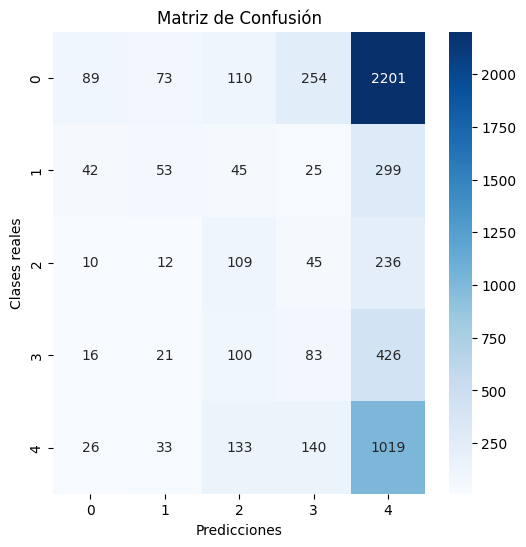

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extraer las clases reales y las predicciones
y_true = np.argmax(y_valid_class, axis=-1).flatten()  # Clases reales
pred_classes = np.argmax(model.predict(X_valid)["class_output"], axis=-1).flatten()  # Predicciones del modelo

# Generar la matriz de confusión
cm = confusion_matrix(y_true, pred_classes)

# Mostrar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.xlabel("Predicciones")
plt.ylabel("Clases reales")
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
pred_bboxes = np.clip(pred_bboxes, 0, 1)
print(f"📌 Min/Max des bounding boxes après correction : {pred_bboxes.min()} / {pred_bboxes.max()}")


📌 Min/Max des bounding boxes après correction : 0.0 / 1.0


"""
### Resumen de las 3 estrategias de entrenamiento

Esta implementación incluye tres versiones optimizadas del entrenamiento de SSD MobileNetV2, cada una con una estrategia diferente para mejorar el rendimiento del modelo:

| **Versión** | **Optimizador** | **Learning Rate** | **Batch Size** | **Características** |
|------------|---------------|-----------------|------------|---------------------------|
| **V1 (YOLO-like)** | **SGD + Momentum** | 0.005 | 16 | Reducción del sobreajuste, convergencia lenta pero estable |
| **V2 (Adam + Scheduler)** | **Adam** | Dinámico (Scheduler) | 8 → 16 | Aprendizaje progresivo, adaptación dinámica |
| **V3 (RMSprop + Focal Loss)** | **RMSprop** | 0.001 | 8 | Mejor manejo de clases desbalanceadas |

**Objetivo**: Comparar estas estrategias para determinar cuál ofrece el mejor equilibrio entre precisión, velocidad y robustez en la detección de objetos.

In [ ]:
print(f"📌 Vérification avant `model.fit()` :")
print(f" - X_train.shape : {X_train.shape}")
print(f" - y_train_class.shape : {y_train_class.shape}, y_train_bbox.shape : {y_train_bbox.shape}")
print(f" - y_valid_class.shape : {y_valid_class.shape}, y_valid_bbox.shape : {y_valid_bbox.shape}")

📌 Vérification avant `model.fit()` :
 - X_train.shape : (1963, 224, 224, 3)
 - y_train_class.shape : (1963, 10), y_train_bbox.shape : (1963, 10, 4)
 - y_valid_class.shape : (560, 10), y_valid_bbox.shape : (560, 10, 4)


📌 y_valid_class.shape après correction : (560, 10, 5)
📌 y_valid_bbox.shape avant evaluation : (560, 10, 4)
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - bbox_output_loss: 0.0607 - bbox_output_mean_absolute_error: 0.2631 - class_output_accuracy: 0.5233 - class_output_loss: 1.4976 - loss: 1.5584
🔍 Résultats de l'évaluation : [1.556401014328003, 1.4934911727905273, 0.06165209785103798, 0.2657160460948944, 0.5300000309944153]
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
✅ Correction appliquée avant la validation et affichage des résultats.
📌 Affichage de l'image à l'index 68


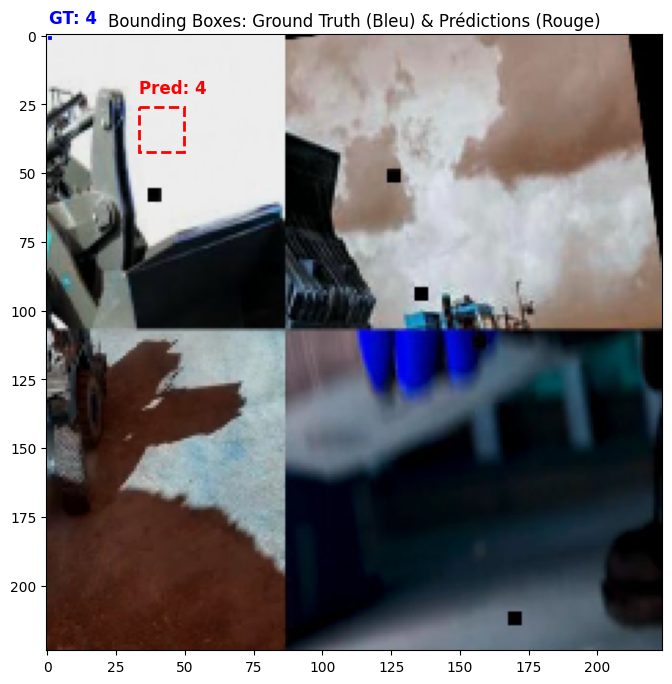

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
import random

# ✅ Vérifier si `y_valid_class` est bien en one-hot encoding avant `model.evaluate()`
if y_valid_class.shape[-1] != 5:  # Vérifier si la dernière dimension correspond au nombre de classes
    print("⚠️ Conversion de y_valid_class en one-hot encoding")
    y_valid_class = tf.keras.utils.to_categorical(y_valid_class, num_classes=5)

# 🔹 Vérification de la forme des données avant évaluation
print(f"📌 y_valid_class.shape après correction : {y_valid_class.shape}")
print(f"📌 y_valid_bbox.shape avant evaluation : {y_valid_bbox.shape}")

# 🔹 Évaluation du modèle (ON GARDE `y_valid_class` en one-hot encoding)
evaluation_results = model.evaluate(X_valid, {"class_output": y_valid_class, "bbox_output": y_valid_bbox})
print(f"🔍 Résultats de l'évaluation : {evaluation_results}")

# 🔹 Prédictions sur l'ensemble de validation
preds = model.predict(X_valid)

# ✅ Correction des bounding boxes après prédiction
pred_bboxes = preds["bbox_output"] * np.array([IMG_SIZE, IMG_SIZE, IMG_SIZE, IMG_SIZE])  # Convertir en pixels

# ✅ Après prédiction, on applique `argmax()` pour obtenir les indices des classes
pred_classes = np.argmax(preds["class_output"], axis=-1) if "class_output" in preds else None

# ✅ Filtrage des bounding boxes vides avant affichage
valid_mask = np.any(y_valid_bbox > 0, axis=-1)  # Masque pour les boîtes valides
filtered_y_valid_bbox = [bboxes[mask] for bboxes, mask in zip(y_valid_bbox, valid_mask)]
filtered_pred_bboxes = [bboxes[:len(gt)] for bboxes, gt in zip(pred_bboxes, filtered_y_valid_bbox)]

print("✅ Correction appliquée avant la validation et affichage des résultats.")

# ✅ Définition de la fonction pour afficher les bounding boxes
def visualize_image_with_boxes(image, gt_bboxes, pred_bboxes=None, gt_classes=None, pred_classes=None):
    """
    Affiche une image avec les bounding boxes ground truth et prédictes.

    - Bleu : Bounding boxes ground truth
    - Rouge (pointillés) : Bounding boxes prédites par le modèle
    """
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # 🔹 Affichage des ground truth (GT) en BLEU
    for i, bbox in enumerate(gt_bboxes):
        x_min, y_min, x_max, y_max = bbox
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                 linewidth=2, edgecolor='blue', facecolor='none')
        ax.add_patch(rect)
        if gt_classes is not None:
            ax.text(x_min, y_min - 5, f"GT: {gt_classes[i]}", color='blue', fontsize=12, fontweight='bold')

    # 🔹 Affichage des prédictions en ROUGE (pointillés)
    if pred_bboxes is not None and len(pred_bboxes) > 0:
        for i, bbox in enumerate(pred_bboxes):
            x_min, y_min, x_max, y_max = bbox
            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                     linewidth=2, edgecolor='red', facecolor='none', linestyle="dashed")
            ax.add_patch(rect)
            if pred_classes is not None and len(pred_classes) > i:
                ax.text(x_min, y_min - 5, f"Pred: {pred_classes[i]}", color='red', fontsize=12, fontweight='bold')

    plt.title("Bounding Boxes: Ground Truth (Bleu) & Prédictions (Rouge)")
    plt.show()

# 🔹 Sélection aléatoire d'une image test pour l'affichage
index = random.randint(0, len(X_valid) - 1)  # 🔥 Choix d'un index aléatoire
print(f"📌 Affichage de l'image à l'index {index}")

image = X_valid[index]
gt_bboxes = filtered_y_valid_bbox[index]
gt_classes = np.argmax(y_valid_class[index], axis=-1)  # ✅ `argmax()` après évaluation

# ✅ Vérification avant affichage
if len(filtered_pred_bboxes) > index:
    pred_bboxes = filtered_pred_bboxes[index]
    pred_classes = pred_classes[index] if pred_classes is not None else None
else:
    pred_bboxes = None
    pred_classes = None
    print("⚠️ Aucune prédiction trouvée pour cette image.")

# 📌 Affichage de l'image avec bounding boxes ground truth et prédictions
visualize_image_with_boxes(image, gt_bboxes, pred_bboxes, gt_classes, pred_classes)








### Evaluación del modelo SSD
Esta función evalúa el modelo SSD en un conjunto de validación.
Compara las predicciones con los valores reales y calcula métricas importantes como:
- Precisión (Precisión de las detecciones correctas)
- Recall (Capacidad del modelo para detectar todos los objetos)
- mAP (Media de la precisión en diferentes umbrales)
- FPS (Velocidad de inferencia en imágenes por segundo)

También genera un gráfico que muestra los resultados obtenidos.

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
📌 Dimensions y_valid_class : (560, 10, 5)
📌 Dimensions y_valid_bbox : (560, 10, 4)
📌 Dimensions pred_classes : (560, 10, 5)
📌 Dimensions pred_bboxes : (560, 10, 4)
📌 Min/Max des scores prédits : 0.15071094036102295 / 0.3971561789512634
📌 Nombre total de bounding boxes après NMS : 2687


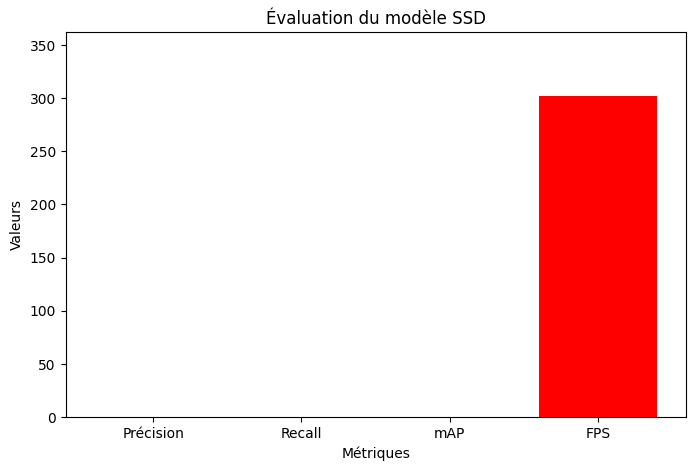


=== Résultats de la validation SSD ===
Précision: 0.00
Recall: 0.00
mAP: 0.03
FPS: 301.63


In [ ]:
import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Fonction pour appliquer la Non-Maximum Suppression (NMS)
def apply_nms(pred_bboxes, pred_classes, score_threshold=0.1, iou_threshold=0.3, max_output_size=10):
    """
    Applique la suppression des non-maxima (NMS) sur les prédictions du modèle SSD.
    - Réduction du `score_threshold` pour éviter l'élimination complète.
    - Réduction du `iou_threshold` pour moins de suppression agressive.
    - Vérification du format `[x_min, y_min, x_max, y_max]`.
    """
    selected_boxes = []
    selected_scores = []

    for i in range(pred_bboxes.shape[0]):  # Parcourir chaque image
        scores = np.max(pred_classes[i], axis=-1)  # On prend la classe avec le score max
        mask = scores > score_threshold  # Filtrer les prédictions avec un score suffisant

        filtered_bboxes = pred_bboxes[i][mask]
        filtered_scores = scores[mask]

        if len(filtered_bboxes) > 0:
            # 🔥 Vérification et conversion en format `[x_min, y_min, x_max, y_max]`
            filtered_bboxes[:, 2] += filtered_bboxes[:, 0]
            filtered_bboxes[:, 3] += filtered_bboxes[:, 1]

            indices = tf.image.non_max_suppression(
                boxes=filtered_bboxes,
                scores=filtered_scores,
                max_output_size=max_output_size,
                iou_threshold=iou_threshold
            ).numpy()  # Indices des meilleures boîtes

            selected_boxes.append(filtered_bboxes[indices])
            selected_scores.append(filtered_scores[indices])

    return selected_boxes, selected_scores

# ✅ Fonction pour évaluer le modèle SSD avec NMS
def evaluate_ssd(model, X_valid, y_valid_class, y_valid_bbox, iou_threshold=0.5, score_threshold=0.1):
    start_time = time.time()

    # ✅ Prédictions du modèle
    preds = model.predict(X_valid)
    pred_bboxes = preds['bbox_output']  # Bounding boxes prédites
    pred_classes = preds['class_output']  # Classes prédites

    # ✅ Vérification des dimensions
    print(f"📌 Dimensions y_valid_class : {y_valid_class.shape}")
    print(f"📌 Dimensions y_valid_bbox : {y_valid_bbox.shape}")
    print(f"📌 Dimensions pred_classes : {pred_classes.shape}")
    print(f"📌 Dimensions pred_bboxes : {pred_bboxes.shape}")

    # ✅ Clipper les bounding boxes
    pred_bboxes = np.clip(pred_bboxes, 0, 1)

    # ✅ Normaliser les classes avec softmax
    pred_classes = tf.nn.softmax(pred_classes).numpy()

    # ✅ Vérifier les valeurs min/max des scores
    print(f"📌 Min/Max des scores prédits : {pred_classes.min()} / {pred_classes.max()}")

    # ✅ Appliquer NMS pour réduire le bruit
    filtered_bboxes, filtered_scores = apply_nms(pred_bboxes, pred_classes, score_threshold=score_threshold, iou_threshold=iou_threshold)

    # ✅ Vérification après NMS
    print(f"📌 Nombre total de bounding boxes après NMS : {sum(len(b) for b in filtered_bboxes)}")

    # ✅ Calcul des métriques de performance
    precision_list = []
    recall_list = []
    iou_list = []

    for i in range(len(X_valid)):
        gt_bbox = y_valid_bbox[i]
        gt_class = np.argmax(y_valid_class[i], axis=-1)

        pred_bbox = filtered_bboxes[i] if i < len(filtered_bboxes) else []
        pred_class = np.argmax(pred_classes[i], axis=-1)

        iou_scores = []
        correct_detections = 0

        for j in range(len(pred_bbox)):
            if j >= len(gt_bbox):  # 🔥 Protection contre dépassement d’index
                break

            iou = compute_iou(pred_bbox[j], gt_bbox[j])
            iou_scores.append(iou)

            if iou > iou_threshold and pred_class[j] == gt_class[j]:
                correct_detections += 1

        iou_list.append(np.mean(iou_scores) if iou_scores else 0)
        precision = correct_detections / max(len(pred_bbox), 1)
        recall = correct_detections / max(len(gt_bbox), 1)

        precision_list.append(precision)
        recall_list.append(recall)

    end_time = time.time()
    inference_time = (end_time - start_time) / len(X_valid) * 1000  # en ms
    fps = 1000 / inference_time

    results = {
        "Précision": np.mean(precision_list),
        "Recall": np.mean(recall_list),
        "mAP": np.mean(iou_list),
        "FPS": fps
    }

    # ✅ Générer un graphique des métriques
    plot_metrics(results)

    return results

# ✅ Exécution de l’évaluation
results_ssd = evaluate_ssd(model, X_valid, y_valid_class, y_valid_bbox)
print("\n=== Résultats de la validation SSD ===")
for metric, value in results_ssd.items():
    print(f"{metric}: {value:.2f}")













In [ ]:
unique_class_preds, counts = np.unique(np.argmax(pred_classes, axis=-1), return_counts=True)
print(f"📌 Répartition des classes prédites : {dict(zip(unique_class_preds, counts))}")


📌 Répartition des classes prédites : {1: 1}


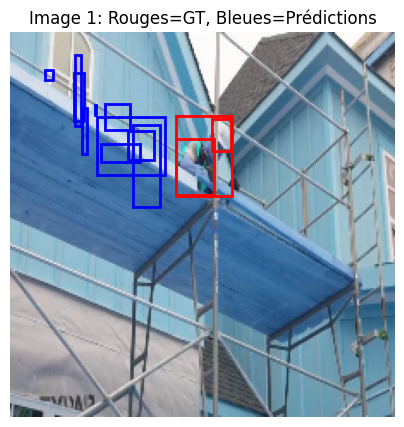

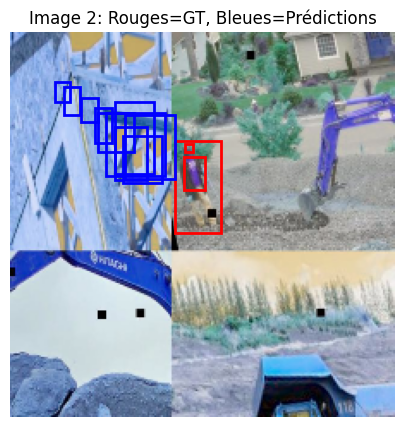

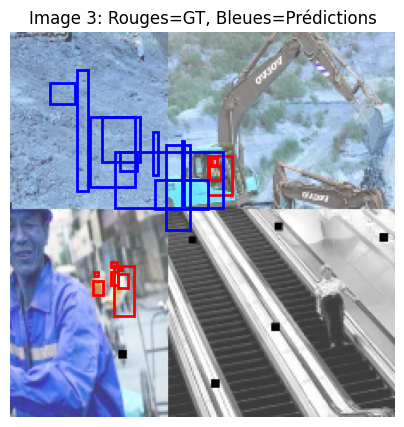

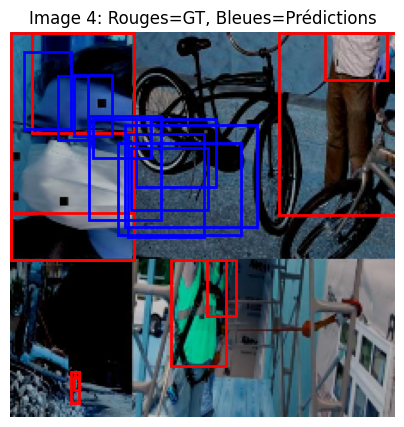

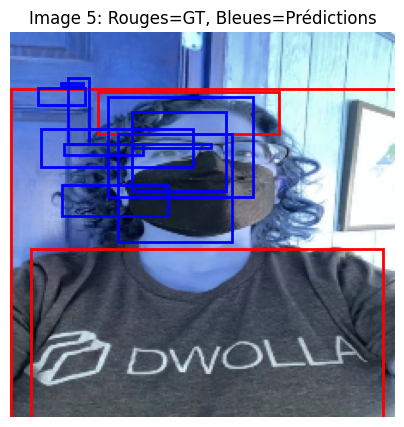

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):  # Afficher 5 images de test
    plt.figure(figsize=(5, 5))
    plt.imshow(X_valid[i])  # Image d'entrée

    # Bounding box réelle (en rouge)
    for bbox in y_valid_bbox[i]:
        plt.gca().add_patch(plt.Rectangle(
            (bbox[0] * X_valid.shape[1], bbox[1] * X_valid.shape[2]),
            (bbox[2] - bbox[0]) * X_valid.shape[1],
            (bbox[3] - bbox[1]) * X_valid.shape[2],
            fill=False, edgecolor="red", linewidth=2))

    # Bounding box prédite (en bleu)
    for bbox in pred_bboxes[i]:
        plt.gca().add_patch(plt.Rectangle(
            (bbox[0] * X_valid.shape[1], bbox[1] * X_valid.shape[2]),
            (bbox[2] - bbox[0]) * X_valid.shape[1],
            (bbox[3] - bbox[1]) * X_valid.shape[2],
            fill=False, edgecolor="blue", linewidth=2))

    plt.title(f"Image {i+1}: Rouges=GT, Bleues=Prédictions")
    plt.axis("off")
    plt.show()


In [ ]:
# Vérifier un échantillon d'annotations réelles
for i in range(5):
    print(f"📌 Image {i} - Bounding boxes réelles : {y_valid_bbox[i]}")
    print(f"📌 Image {i} - Classes réelles : {np.argmax(y_valid_class[i], axis=-1)}")


📌 Image 0 - Bounding boxes réelles : [[0.521875  0.225     0.571875  0.3078125]
 [0.4296875 0.275     0.5265625 0.421875 ]
 [0.4296875 0.2171875 0.5734375 0.425    ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]]
📌 Image 0 - Classes réelles : [0 1 4 0 0 0 0 0 0 0]
📌 Image 1 - Bounding boxes réelles : [[0.45      0.321875  0.503125  0.4078125]
 [0.4515625 0.2890625 0.471875  0.309375 ]
 [0.4265625 0.28125   0.5453125 0.51875  ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]]
📌 Image 1 - 

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Classes détectées après filtrage : {0: 'chaleco-y-casco-ajax', 1: 'casco', 2: 'chaleco', 3: 'no-casco', 4: 'no-chaleco', 5: 'persona'}


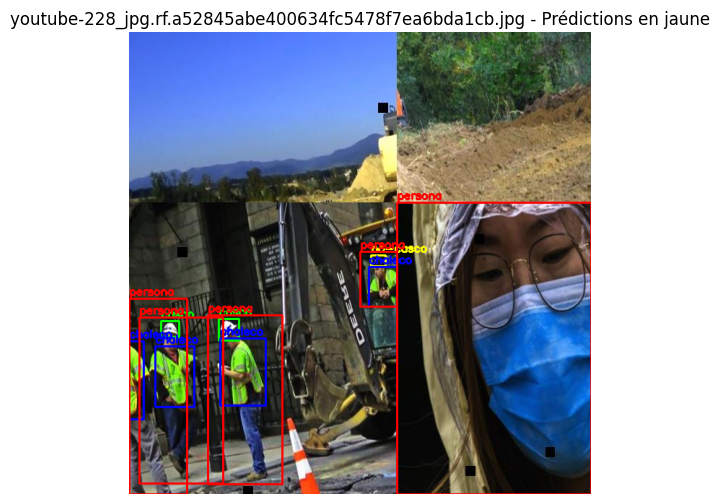

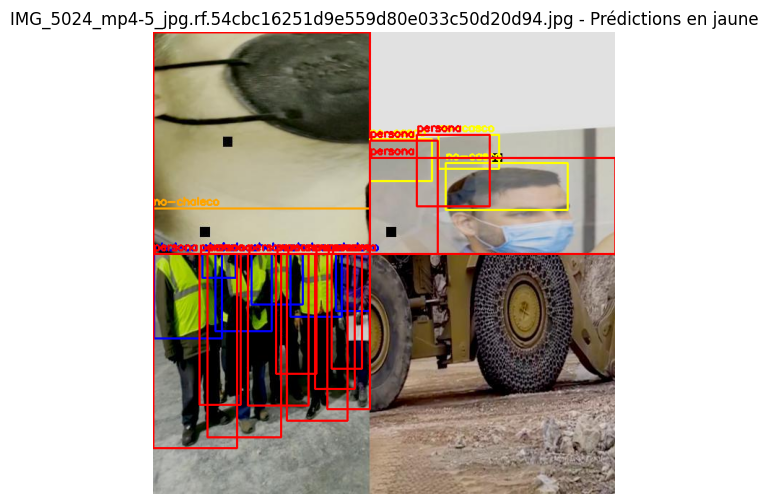

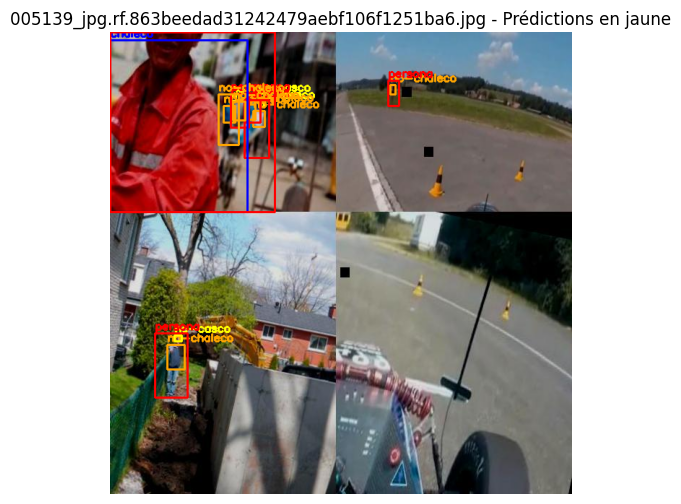

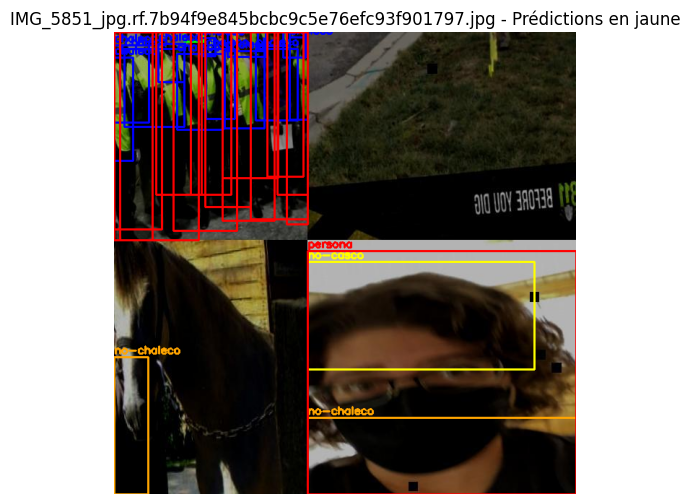

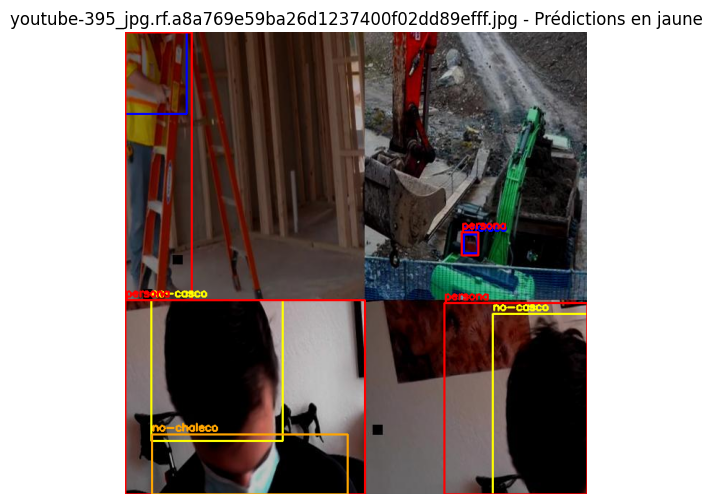

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np

# Fonction pour visualiser les images avec bounding boxes réelles et prédites
def visualize_validation_bounding_boxes(dataset_path, predictions, num_images=5, confidence_threshold=0.5):
    """
    Affiche les images de validation avec les annotations réelles (en couleur) et les prédictions (en jaune).
    """
    valid_images_path = os.path.join(dataset_path, "valid", "images")
    valid_annotations_path = os.path.join(dataset_path, "valid", "annotations", "_annotations.coco.json")

    # Charger les annotations COCO
    with open(valid_annotations_path, 'r') as f:
        annotations = json.load(f)

    # Définir les couleurs pour chaque classe
    class_colors = {
        "persona": (255, 0, 0),       # Rouge
        "casco": (0, 255, 0),         # Vert
        "chaleco": (0, 0, 255),       # Bleu
        "no-casco": (255, 255, 0),    # Cyan
        "no-chaleco": (255, 165, 0)   # Orange
    }

    # Extraction des infos d'annotations et d'images
    images_info = {img["id"]: img["file_name"] for img in annotations["images"]}
    annotations_info = annotations["annotations"]
    categories = {cat["id"]: cat["name"].lower().strip() for cat in annotations["categories"]}

    print("Classes détectées après filtrage :", categories)

    # Sélectionner aléatoirement des images
    selected_images = random.sample(list(images_info.keys()), min(num_images, len(images_info)))

    for i, image_id in enumerate(selected_images):
        image_name = images_info[image_id]
        image_path = os.path.join(valid_images_path, image_name)

        if not os.path.exists(image_path):
            print(f"⚠️ Image introuvable : {image_path}")
            continue

        # Charger et convertir l'image
        image = cv2.imread(image_path)
        if image is None:
            print(f"❌ Erreur lors du chargement de l'image : {image_path}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Obtenir les annotations réelles
        img_annotations = [ann for ann in annotations_info if ann["image_id"] == image_id]

        # Dessiner les bounding boxes réelles
        for ann in img_annotations:
            bbox = ann["bbox"]  # [x, y, largeur, hauteur]
            x, y, w, h = map(int, bbox)
            class_id = ann["category_id"]
            class_name = categories.get(class_id, "unknown")
            color = class_colors.get(class_name, (255, 255, 255))  # Blanc si classe inconnue

            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, class_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Vérifier si des prédictions existent
        if i >= len(predictions):
            print(f"⚠️ Pas de prédictions disponibles pour {image_name}")
            continue

        # Dessiner les bounding boxes prédites
        for bbox in predictions[i]:
            if len(bbox) < 5:
                continue  # Ignorer si la bbox est incomplète

            x_min, y_min, x_max, y_max, confidence = bbox

            # Filtrer sur le seuil de confiance
            if confidence < confidence_threshold:
                continue

            # Convertir bbox normalisée en coordonnées pixels
            x1, y1, x2, y2 = (np.array([x_min, y_min, x_max, y_max]) * [image.shape[1], image.shape[0], image.shape[1], image.shape[0]]).astype(int)

            # Dessiner en jaune
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 2)
            cv2.putText(image, "pred", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

        # Afficher l'image
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.title(f"{image_name} - Prédictions en jaune")
        plt.axis("off")
        plt.show()

# ✅ Obtenir les prédictions des bounding boxes et classes
preds = model.predict(X_valid)

# 🔥 Correction : Assurez-vous que preds['bbox_output'] contient un score de confiance
bbox_preds = np.concatenate([preds["bbox_output"], np.max(preds["class_output"], axis=-1, keepdims=True)], axis=-1)

# ✅ Exécuter la visualisation avec correction
visualize_validation_bounding_boxes(dataset_path, bbox_preds)



# Evaluación visual del dataset de entrenamiento
Esta función muestra imágenes del conjunto de entrenamiento con sus bounding boxes.
Permite verificar si las anotaciones están correctamente posicionadas y visibles.

# Características:
- Muestra varias imágenes aleatorias del dataset.
- Dibuja las bounding boxes sobre las imágenes.
- Permite detectar posibles problemas en las anotaciones.

Clases utilizadas después del filtrado: {1: 'casco', 2: 'chaleco', 3: 'no-casco', 4: 'no-chaleco', 5: 'persona'}


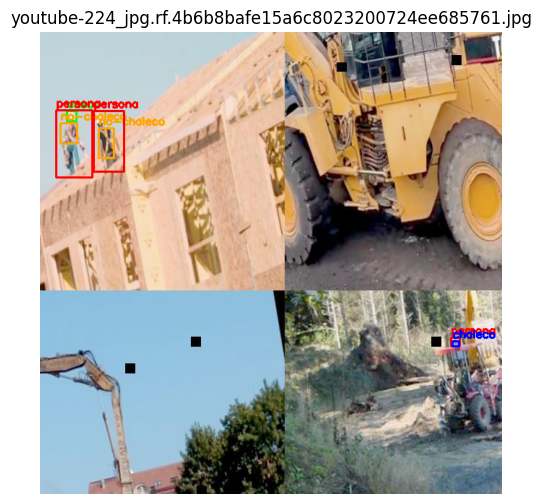

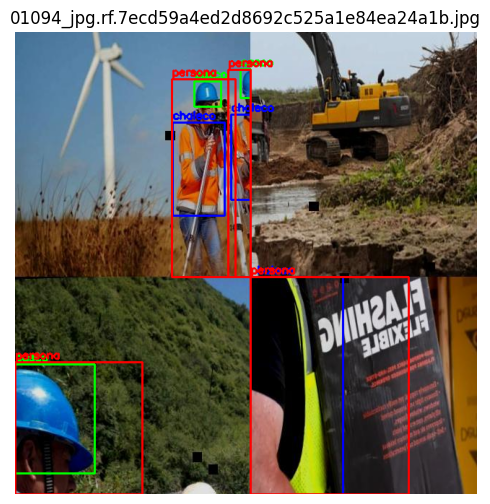

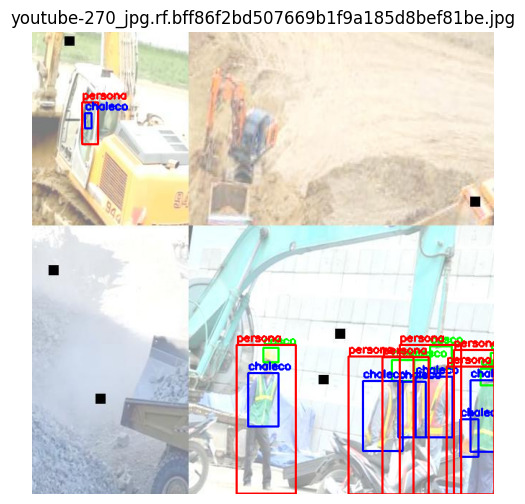

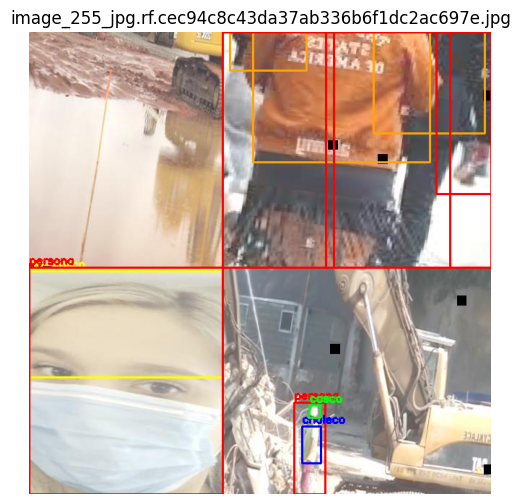

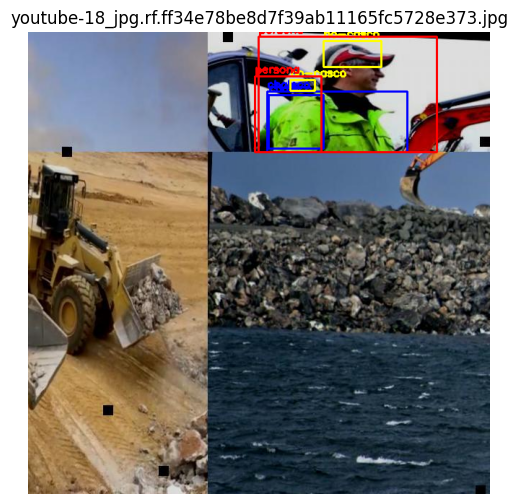

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import os
import random

# Función para visualizar imágenes con sus bounding boxes en diferentes colores según la clase
def visualize_bounding_boxes(dataset_path, num_images=5):

    # Definir las rutas de las imágenes y las anotaciones
    train_images_path = os.path.join(dataset_path, "train", "images")
    train_annotations_path = os.path.join(dataset_path, "train", "annotations", "_annotations.coco.json")

    # Cargar las anotaciones desde el archivo JSON
    with open(train_annotations_path, 'r') as f:
        annotations = json.load(f)

    # Definir los colores para cada clase
    class_colors = {
        "persona": (255, 0, 0),       # Azul
        "casco": (0, 255, 0),         # Verde
        "chaleco": (0, 0, 255),       # Rojo
        "no-casco": (255, 255, 0),    # Cian
        "no-chaleco": (255, 165, 0)   # Naranja
    }

    # Extraer información de imágenes y anotaciones
    images_info = {img["id"]: img["file_name"] for img in annotations["images"]}
    annotations_info = annotations["annotations"]
    categories = {cat["id"]: cat["name"].lower().strip() for cat in annotations["categories"] if cat["id"] in [1, 2, 3, 4, 5]}  # Ignorar la clase 0

    print("Clases utilizadas después del filtrado:", categories)

    # Seleccionar aleatoriamente algunas imágenes
    selected_images = random.sample(list(images_info.keys()), min(num_images, len(images_info)))

    for image_id in selected_images:
        image_name = images_info[image_id]
        image_path = os.path.join(train_images_path, image_name)

        # Verificar si la imagen existe
        if not os.path.exists(image_path):
            print(f"⚠️ Imagen no encontrada: {image_path}")
            continue

        # Cargar la imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"❌ Error al cargar la imagen: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Obtener las anotaciones asociadas a esta imagen
        img_annotations = [ann for ann in annotations_info if ann["image_id"] == image_id and ann["category_id"] in [1, 2, 3, 4, 5]]  # Ignorar la clase 0

        # Dibujar las bounding boxes con los colores correspondientes a las clases
        for ann in img_annotations:
            bbox = ann["bbox"]  # [x, y, ancho, alto]
            x, y, w, h = map(int, bbox)
            class_id = ann["category_id"]
            class_name = categories.get(class_id, "unknown")
            class_name = class_name.lower().strip()  # Normalización
            color = class_colors.get(class_name, (255, 255, 255))  # Blanco si la clase es desconocida

            if color == (255, 255, 255):
                print(f"⚠️ Atención: Se está usando el color por defecto para la clase desconocida '{class_name}'")

            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, class_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Mostrar la imagen
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.title(image_name)
        plt.axis("off")
        plt.show()

# Ejecutar la función con la ruta del dataset
visualize_bounding_boxes(dataset_path)





In [ ]:
import numpy as np

# Sauvegarde des fichiers
np.save("y_train_bbox.npy", y_train_bbox)
np.save("y_valid_bbox.npy", y_valid_bbox)
np.save("y_train_class.npy", y_train_class)
np.save("y_valid_class.npy", y_valid_class)

In [ ]:
import ace_tools as tools # Import the module after installing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification des dimensions
train_bbox_shape = y_train_bbox.shape
valid_bbox_shape = y_valid_bbox.shape

# Vérification des valeurs min/max pour train et validation
train_bbox_min, train_bbox_max = y_train_bbox.min(), y_train_bbox.max()
valid_bbox_min, valid_bbox_max = y_valid_bbox.min(), y_valid_bbox.max()

# Création d'un DataFrame pour les statistiques des bounding boxes
df_bbox_stats = pd.DataFrame({
    "Dataset": ["Train", "Validation"],
    "Shape": [train_bbox_shape, valid_bbox_shape],
    "Min": [train_bbox_min, valid_bbox_min],
    "Max": [train_bbox_max, valid_bbox_max]
})

# Distribution des bounding boxes pour Train et Validation
train_bbox_flat = y_train_bbox.flatten()
valid_bbox_flat = y_valid_bbox.flatten()

# Création des DataFrames pour affichage
df_train_bbox = pd.DataFrame(train_bbox_flat, columns=["Values"])
df_train_bbox["Dataset"] = "Train"

df_valid_bbox = pd.DataFrame(valid_bbox_flat, columns=["Values"])
df_valid_bbox["Dataset"] = "Validation"

df_combined = pd.concat([df_train_bbox, df_valid_bbox])

# Affichage des statistiques
import ace_tools as tools
tools.display_dataframe_to_user(name="Bounding Box Statistics", dataframe=df_bbox_stats)

# Visualisation de la distribution des bounding boxes
plt.figure(figsize=(10, 5))
sns.histplot(data=df_combined, x="Values", hue="Dataset", bins=50, kde=True)
plt.title("Distribution des Bounding Boxes pour Train et Validation")
plt.xlabel("Valeur Normalisée")
plt.ylabel("Fréquence")
plt.show()


ModuleNotFoundError: No module named 'ace_tools'